In [2]:
from sklearn.datasets import make_regression

In [3]:
# X es mayuscula porque es matrix, y es un vector
X, y = make_regression(n_samples = 150, n_features = 1, random_state = 42, noise = 50)

In [4]:
X.shape

(150, 1)

In [5]:
y.shape

(150,)

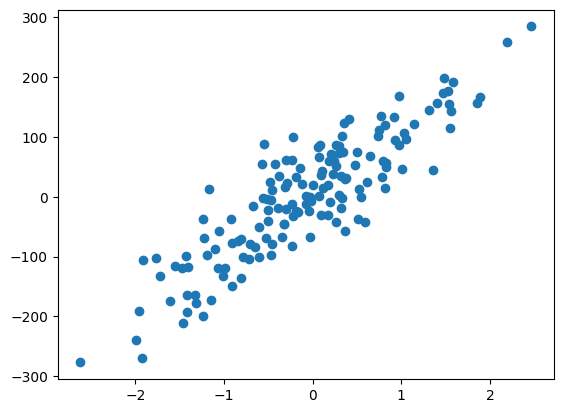

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X.shape, X_train.shape, X_test.shape
# Se sugiere 80% de training 20% de testing 

((150, 1), (120, 1), (30, 1))

$$
f(x) = y \approx h(x) = \hat y
%%

In [18]:
import numpy as np

class LinearReg:

    def __init__(self, lr = .001, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y, debug = False):
        # M is the size of the samples
        # N is the size of the features

        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.reshape(m,1)

        losses = []
        b_list = []
        w_list = []

        for epoch in range(self.epochs):
            # Calculate prediction 
            y_hat = np.dot(X, self.weights) + self.bias

            # Save current loss
            loss = np.mean((y_hat - y)**2)
            losses.append(loss)

            # Calculate gradient
            dw = (-2/m) * np.dot(X.T, (y - y_hat))
            db = (-2/m) * np.sum(y - y_hat)

            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            # Save the params
            w_list.append(self.weights)
            b_list.append(self.bias)
            if debug:
                print(f"epoch: {epoch}, loss: {loss}, weight: {self.weights}, bias: {self.bias}")
    
    def predict(self,X):
        """
        Predict values for input X using the trained parameters.
        """
        if self.weights is None or self.bias is None:
            raise Exception("Model has not been trained yet. Call fit() first.")

        # If X is a 1D array (single sample), reshape it to (1, n_features)
        if X.ndim == 1:
            X = X.reshape(1, X.shape[0])  # Fixed shape: (1, n_features)

        return np.dot(X, self.weights) + self.bias



In [ ]:
# Train the model
model = LinearReg()
model.fit(X_train, y_train)

# Predict on test set
y_hat = model.predict(X_test)

# Calculate MSE on test set
mse = np.mean((y_hat - y_test.reshape(-1, 1))**2)
print("Test MSE:", mse)

# Create line for regression visualization
X_line = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
y_line = model.predict(X_line)

# Plot
plt.scatter(X, y, alpha=0.5, label='Real data')
plt.plot(X_line, y_line, color='r', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


epoch: 0, loss: 11166.775706971368, weight: [[183.84563216]], bias: [-2.23851957]
epoch: 1, loss: 9875.14551624211, weight: [[15.42877288]], bias: [30.37771322]
epoch: 2, loss: 9622.285314338886, weight: [[175.46923808]], bias: [-29.98561056]
epoch: 3, loss: 10168.334102676457, weight: [[18.5498946]], bias: [56.74477272]
epoch: 4, loss: 11405.390190954295, weight: [[176.94697078]], bias: [-55.83845759]
epoch: 5, loss: 13319.204668086833, weight: [[12.93348791]], bias: [82.84107984]
epoch: 6, loss: 15968.440097146631, weight: [[186.40426981]], bias: [-82.86008151]
epoch: 7, loss: 19475.735860002933, weight: [[-0.20357105]], bias: [111.42081699]
epoch: 8, loss: 24027.227194839168, weight: [[203.17736633]], bias: [-113.60418136]
epoch: 9, loss: 29878.728949971777, weight: [[-20.67243346]], bias: [144.92832567]
epoch: 10, loss: 37367.85229960075, weight: [[227.4955409]], bias: [-150.48398537]
epoch: 11, loss: 46932.086712151584, weight: [[-49.08124609]], bias: [185.81460863]
epoch: 12, los

Test MSE: 2365.509110674516


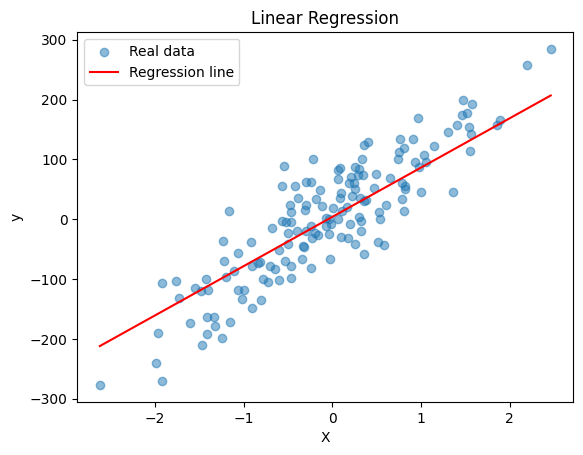

In [19]:
# Train the model
model = LinearReg()
model.fit(X_train, y_train)

# Predict on test set
y_hat = model.predict(X_test)

# Calculate MSE on test set
mse = np.mean((y_hat - y_test.reshape(-1, 1))**2)
print("Test MSE:", mse)

# Create line for regression visualization
X_line = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
y_line = model.predict(X_line)

# Plot
plt.scatter(X, y, alpha=0.5, label='Real data')
plt.plot(X_line, y_line, color='r', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Modified lr and epochs until I got something more or less better.

I started with lr = 1 but the numbers were too big and the line was out of scale.
Then used something smaller like lr = 0.001 and epochs = 100 (same as first experiment.)

The plot was better but the slope seemed to be off, so decided to use epochs = 1000 and got the previous resulted which seemed to be betters. :)